In [1]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
output_file_path = "/data/private/pdutta/Wang_collaborator/PCA_result"

In [7]:
df = pd.read_excel("/data/private/pdutta/Collab_data/Wang_collaborator/Survival_vs_death_first_day.xlsx")
df.shape

(10788, 49)

In [8]:
df.head(20)

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1,1,864.202653,653.388036,533.532407,622.283386,601.880699,523.256709,610.188377,...,648.804947,585.191381,622.984062,507.160020,521.665598,745.204173,625.576933,890.473356,730.239695,606.385944
1,1,1,1,502.256482,568.373980,988.122802,598.716245,645.511790,551.418641,560.904324,...,566.797908,902.976225,541.336585,509.972729,532.145073,513.079211,579.316823,536.086193,690.569707,538.364672
2,1,1,1,463.854773,543.952941,1117.471229,1105.009940,715.989935,541.132319,540.647678,...,587.347451,737.662682,515.291416,780.231103,606.187356,715.505628,569.176593,647.409062,584.242162,537.659564
3,1,1,1,2302.596767,1930.261640,588.094329,2349.308486,1805.575452,751.555302,2199.713286,...,972.315900,534.148282,679.868074,517.515480,490.278047,688.949714,524.763762,517.817829,763.693559,657.198799
4,1,1,1,1058.718278,3091.961426,523.016158,1387.892393,961.391537,963.863794,1837.281826,...,756.944868,1041.256293,543.882557,504.251373,510.271727,610.724690,582.022937,601.456194,720.723971,662.802631
5,1,1,1,2418.428574,845.549889,504.169945,714.724978,1473.802184,1024.840705,1823.074582,...,833.234533,983.239167,620.761161,568.014233,517.090090,626.185674,514.810013,546.470574,703.633271,557.380318
6,1,1,1,2010.637201,2838.474841,529.289258,742.795405,1366.229126,892.249453,983.676275,...,663.685095,1468.113192,637.723136,542.737009,575.964986,636.125353,502.147592,556.446473,878.825424,541.504603
7,1,1,1,1423.890754,954.820268,513.026226,2177.669702,1360.817371,813.376838,2209.773142,...,557.106513,569.331972,576.766093,499.874387,543.436410,574.512953,516.323004,505.780581,634.883564,578.725316
8,1,1,1,1768.039773,841.160408,552.858108,2433.787251,1451.730380,995.562072,1947.466785,...,685.863976,1040.576883,629.455859,524.466321,509.876372,577.984592,550.098389,514.365746,618.125529,512.396249
9,1,1,1,737.596065,945.982474,584.048760,2424.724093,1376.149390,848.858780,1784.940630,...,792.719267,905.189311,642.509867,496.837116,501.755556,601.063696,534.524566,560.327773,633.589630,583.589784


# Feature selection while we are doing classification on Severity

In [9]:
df.groupby(['MouseNo','Severity']).size()

MouseNo  Severity
1        1           655
2        1           724
3        1           565
4        1           112
5        3           602
6        3           484
7        3           563
8        3           544
9        3           613
10       2           555
11       2           592
12       2           672
13       2           579
14       2           625
15       4           509
16       4           533
17       4           484
18       4           653
19       4           724
dtype: int64

In [10]:
grouped_df =  df.groupby(['MouseNo'])
df_mean = grouped_df.mean()
X_train, X_test, y_train, y_test = train_test_split( df_mean.iloc[:,3:], df_mean['Severity'], test_size=0.20, random_state=42, stratify=df_mean['Severity'])

In [9]:
y_train

MouseNo
9     3.0
3     1.0
16    4.0
10    2.0
5     3.0
8     3.0
13    2.0
2     1.0
18    4.0
17    4.0
12    2.0
15    4.0
6     3.0
4     1.0
11    2.0
Name: Severity, dtype: float64

In [10]:
y_test 

MouseNo
14    2.0
1     1.0
19    4.0
7     3.0
Name: Severity, dtype: float64

In [11]:
train_index= list(y_train.index.values)
test_index= list(y_test.index.values)
print("Train Mouse Numbers and severity", train_index, list(y_train.values))
print("Test Mouse Numbers and severity", test_index, list(y_test.values))

Train Mouse Numbers and severity [9, 3, 16, 10, 5, 8, 13, 2, 18, 17, 12, 15, 6, 4, 11] [3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 4.0, 2.0, 4.0, 3.0, 1.0, 2.0]
Test Mouse Numbers and severity [14, 1, 19, 7] [2.0, 1.0, 4.0, 3.0]


In [30]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for key, item in grouped_df:
    if key in train_index :
        print("training")
        df_train = pd.concat([df_train,item], ignore_index=True)
    else:
        df_test = pd.concat([df_test,item], ignore_index=True)

training
training
training
training
training
training
training
training
training
training
training
training
training
training
training


In [32]:
df_test

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1,1,864.202653,653.388036,533.532407,622.283386,601.880699,523.256709,610.188377,...,648.804947,585.191381,622.984062,507.160020,521.665598,745.204173,625.576933,890.473356,730.239695,606.385944
1,1,1,1,502.256482,568.373980,988.122802,598.716245,645.511790,551.418641,560.904324,...,566.797908,902.976225,541.336585,509.972729,532.145073,513.079211,579.316823,536.086193,690.569707,538.364672
2,1,1,1,463.854773,543.952941,1117.471229,1105.009940,715.989935,541.132319,540.647678,...,587.347451,737.662682,515.291416,780.231103,606.187356,715.505628,569.176593,647.409062,584.242162,537.659564
3,1,1,1,2302.596767,1930.261640,588.094329,2349.308486,1805.575452,751.555302,2199.713286,...,972.315900,534.148282,679.868074,517.515480,490.278047,688.949714,524.763762,517.817829,763.693559,657.198799
4,1,1,1,1058.718278,3091.961426,523.016158,1387.892393,961.391537,963.863794,1837.281826,...,756.944868,1041.256293,543.882557,504.251373,510.271727,610.724690,582.022937,601.456194,720.723971,662.802631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,19,4,0,550.871395,2044.161850,515.717981,556.140646,572.097827,510.626169,1083.269287,...,501.717272,552.102296,515.667741,502.085759,502.092115,498.113965,505.180448,504.407853,516.288250,536.029161
2563,19,4,0,613.232655,1275.602473,512.271253,619.303422,554.720844,514.529071,919.005797,...,520.154465,607.760366,513.406305,507.066146,504.403308,496.776715,496.929751,513.858691,520.217333,513.631857
2564,19,4,0,602.559134,1651.866995,518.219228,550.798873,549.070739,521.495008,680.458838,...,527.329898,536.823713,513.269632,530.307808,503.648524,497.063680,505.680650,505.184980,519.820642,512.048193
2565,19,4,0,590.591506,2975.792422,503.140594,644.710486,555.095647,542.214681,1418.389957,...,529.429574,560.505424,513.356738,505.517605,504.518749,500.216924,504.463713,503.078057,524.435094,513.194063


In [38]:
print(df_train.shape)
print(df_test.shape)

(8221, 49)
(2567, 49)


In [40]:
X_train  = df_train.iloc[:,3:]
X_test = df_test.iloc[:,3:]
Y_train = df_train['Severity']
Y_test = df_test['Severity']

In [43]:
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

Random forest 0.39189715621347876


In [44]:
clf.feature_importances_

array([0.0198367 , 0.02183785, 0.01174381, 0.01233211, 0.02250824,
       0.01389201, 0.01475785, 0.01835391, 0.01392781, 0.02216345,
       0.07629312, 0.03151919, 0.01829619, 0.01470402, 0.02403265,
       0.01970162, 0.01337945, 0.03382165, 0.04168716, 0.01166588,
       0.01567653, 0.01207657, 0.01213411, 0.03048755, 0.01308418,
       0.02922972, 0.0124012 , 0.02957468, 0.01812873, 0.02788254,
       0.01316621, 0.01253555, 0.01943094, 0.01222918, 0.0208444 ,
       0.02059079, 0.03699026, 0.02576116, 0.0235917 , 0.01564836,
       0.01564037, 0.01276279, 0.01256538, 0.01104604, 0.07817375,
       0.01189264])

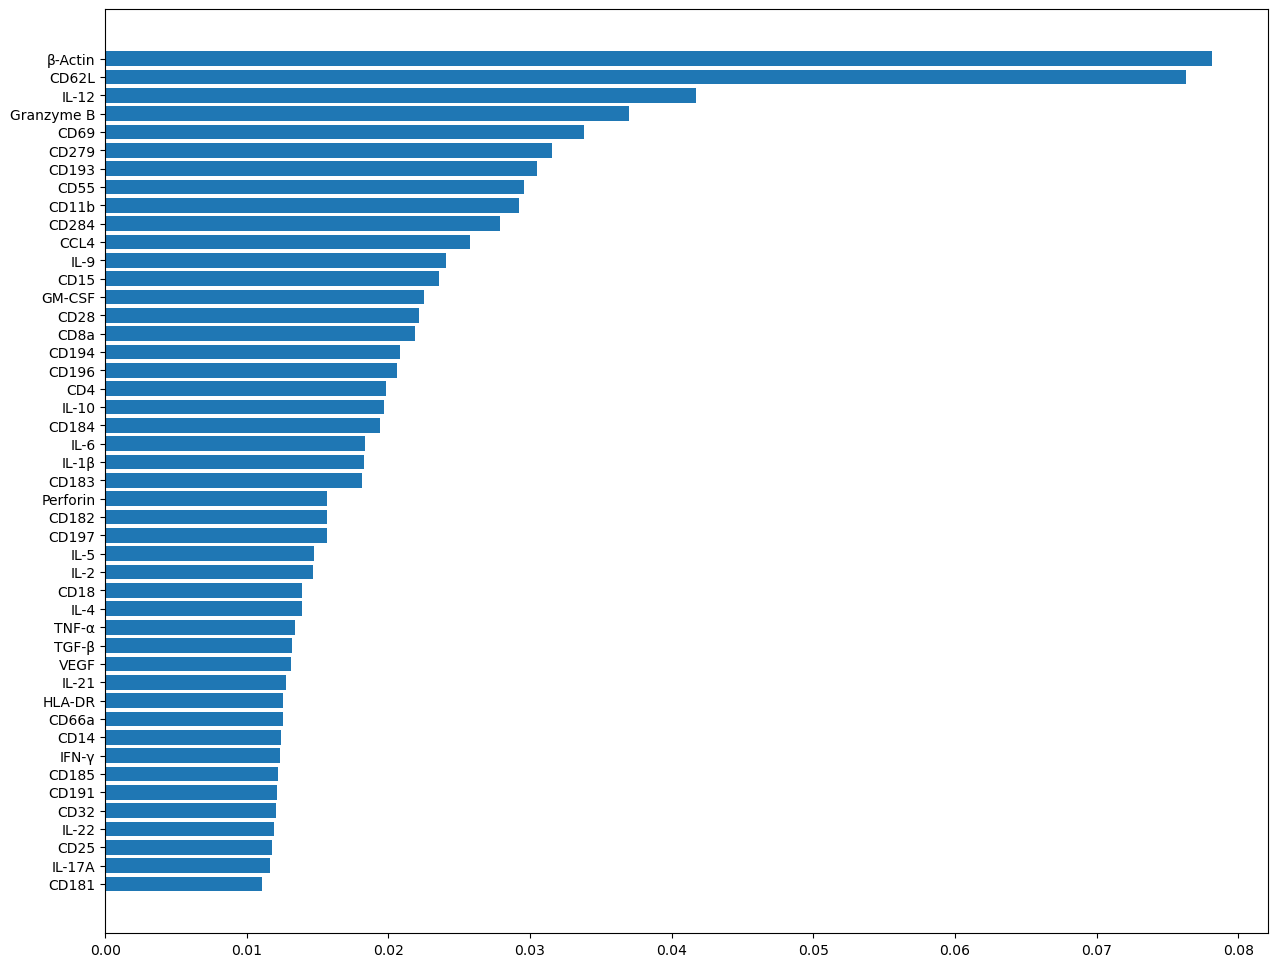

In [45]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [46]:
Y_pred = clf.predict(X_test)
#print("Random forest", metrics.accuracy_score(Y_test, Y_pred))

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[ 16 625   4  10]
 [ 58 386 128  53]
 [ 25 110 333  95]
 [  9  20 424 271]]


In [47]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.39189715621347876


## Mouse wise performance

In [51]:
grouped_df_test = df_test.groupby('MouseNo')
X_train  = df_train.iloc[:,3:]
Y_train = df_train['Severity']

for key, item in grouped_df_test:
    print('Mouse Number',key)
    X_test = df_test[df_test['MouseNo']==key].iloc[:,3:]
    Y_test = df_test[df_test['MouseNo']==key]['Severity']
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

Mouse Number 1
Accuracy for Mouse numer 1 0.024427480916030534
[[ 16 622   6  11]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
Mouse Number 7
Accuracy for Mouse numer 7 0.5968028419182948
[[  0   0   0   0]
 [  0   0   0   0]
 [ 22 115 336  90]
 [  0   0   0   0]]
Mouse Number 14
Accuracy for Mouse numer 14 0.6272
[[  0   0   0   0]
 [ 56 392 124  53]
 [  0   0   0   0]
 [  0   0   0   0]]
Mouse Number 19
Accuracy for Mouse numer 19 0.3701657458563536
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  9  19 428 268]]


## Severity accuracy for all 19 mice

In [60]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Severity']
    Y_test = df_test['Severity']
    print(Y_test[0])
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
testing
(655, 49) (10133, 49) 10788
1
Accuracy for Mouse numer 19 0.022900763358778626
[[ 15 606  26   8]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
2
testing
(724, 49) (10064, 49) 10788
1
Accuracy for Mouse numer 19 0.07458563535911603
[[ 54 472 178  20]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
3
testing
(565, 49) (10223, 49) 10788
1
Accuracy for Mouse numer 19 0.1433628318584071
[[ 81 175 247  62]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
4
testing
(112, 49) (10676, 49) 10788
1
Accuracy for Mouse numer 19 0.2767857142857143
[[31 18 50 13]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
5
testing
(602, 49) (10186, 49) 10788
3
Accuracy for Mouse numer 19 0.6378737541528239
[[  0   0   0   0]
 [  0   0   0   0]
 [ 25  78 384 115]
 [  0   0   0   0]]
6
testing
(484, 49) (10304, 49) 10788
3
Accuracy for Mouse numer 19 0.3884297520661157
[[  0   0   0   0]
 [  0   0   0   0]
 [  4  37 188 255]
 [  0   0   0   0]]
7
testing
(563, 49) (10225, 4

## Survival accuracy for all 19 mice

In [61]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Death_0 /Survival_1']
    Y_test = df_test['Death_0 /Survival_1']
    print(Y_test[0])
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
testing
(655, 49) (10133, 49) 10788
1
Accuracy for Mouse numer 19 0.024427480916030534
[[  0   0]
 [639  16]]
2
testing
(724, 49) (10064, 49) 10788
1
Accuracy for Mouse numer 19 0.6035911602209945
[[  0   0]
 [287 437]]
3
testing
(565, 49) (10223, 49) 10788
1
Accuracy for Mouse numer 19 0.6424778761061947
[[  0   0]
 [202 363]]
4
testing
(112, 49) (10676, 49) 10788
1
Accuracy for Mouse numer 19 0.5982142857142857
[[ 0  0]
 [45 67]]
5
testing
(602, 49) (10186, 49) 10788
0
Accuracy for Mouse numer 19 0.7657807308970099
[[461 141]
 [  0   0]]
6
testing
(484, 49) (10304, 49) 10788
0
Accuracy for Mouse numer 19 0.9400826446280992
[[455  29]
 [  0   0]]
7
testing
(563, 49) (10225, 49) 10788
0
Accuracy for Mouse numer 19 0.8117229129662522
[[457 106]
 [  0   0]]
8
testing
(544, 49) (10244, 49) 10788
0
Accuracy for Mouse numer 19 0.7702205882352942
[[419 125]
 [  0   0]]
9
testing
(613, 49) (10175, 49) 10788
1
Accuracy for Mouse numer 19 0.0734094616639478
[[  0   0]
 [568  45]]
10
testing
(

## Get the top 20 feature and do the classification

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,3:], df['Severity'].to_list(), test_size=0.2, random_state=0)

In [30]:
clf = RandomForestClassifier(n_estimators = 500) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

Random forest 0.1270718232044199


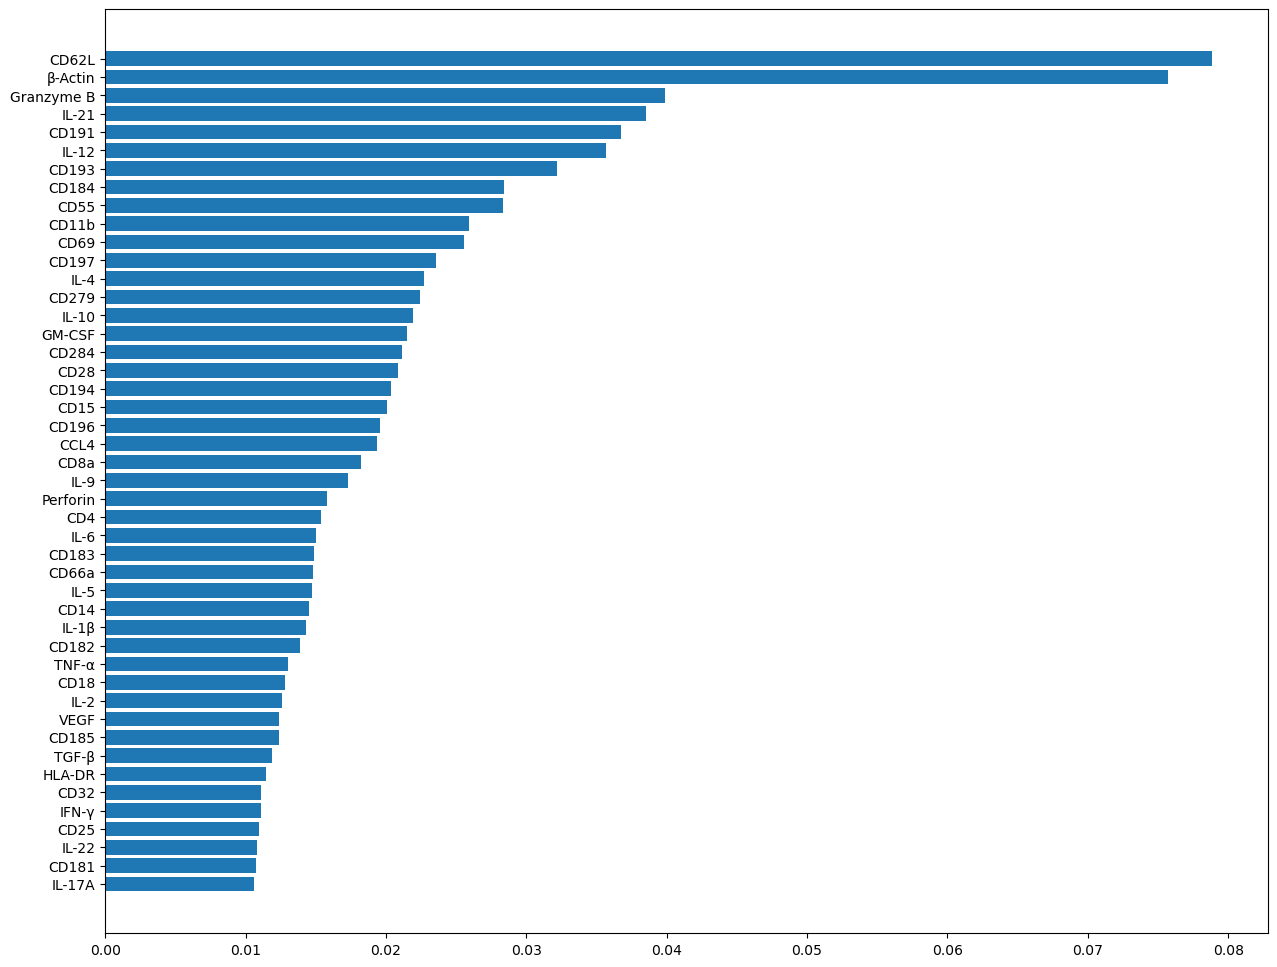

In [17]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [25]:
important_features = ['MouseNo','Severity',	'Death_0 /Survival_1']
for i in reversed(f_i[-20:]):
    important_features.append(i[0])

In [26]:
important_features

['MouseNo',
 'Severity',
 'Death_0 /Survival_1',
 'CD62L',
 'β-Actin',
 'Granzyme B',
 'IL-21',
 'CD191',
 'IL-12',
 'CD193',
 'CD184',
 'CD55',
 'CD11b',
 'CD69',
 'CD197',
 'IL-4',
 'CD279',
 'IL-10',
 'GM-CSF',
 'CD284',
 'CD28',
 'CD194',
 'CD15']

In [28]:
df_important  = df[important_features]
grouped_df_important =  df_important.groupby(['MouseNo'])

### Severity accuracy for all 19 mice based on top 20 features

In [32]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df_important:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Severity']
    Y_test = df_test['Severity']
    print("Severity",Y_test[0])
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
testing
(655, 23) (10133, 23) 10788
Severity 1
Accuracy for Mouse numer 19 0.04732824427480916
[[ 31 556  47  21]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
2
testing
(724, 23) (10064, 23) 10788
Severity 1
Accuracy for Mouse numer 19 0.12845303867403315
[[ 93 430 175  26]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
3
testing
(565, 23) (10223, 23) 10788
Severity 1
Accuracy for Mouse numer 19 0.20707964601769913
[[117 183 209  56]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
4
testing
(112, 23) (10676, 23) 10788
Severity 1
Accuracy for Mouse numer 19 0.29464285714285715
[[33 22 42 15]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
5
testing
(602, 23) (10186, 23) 10788
Severity 3
Accuracy for Mouse numer 19 0.6644518272425249
[[  0   0   0   0]
 [  0   0   0   0]
 [ 18  73 400 111]
 [  0   0   0   0]]
6
testing
(484, 23) (10304, 23) 10788
Severity 3
Accuracy for Mouse numer 19 0.4132231404958678
[[  0   0   0   0]
 [  0   0   0   0]
 [  4  37 200

### Survival  accuracy for all 19 mice based on top 20 features 

In [33]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df_important:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Death_0 /Survival_1']
    Y_test = df_test['Death_0 /Survival_1']
    print('Death_0 /Survival_1',Y_test[0])
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
testing
(655, 23) (10133, 23) 10788
Death_0 /Survival_1 1
Accuracy for Mouse numer 19 0.06870229007633588
[[  0   0]
 [610  45]]
2
testing
(724, 23) (10064, 23) 10788
Death_0 /Survival_1 1
Accuracy for Mouse numer 19 0.6325966850828729
[[  0   0]
 [266 458]]
3
testing
(565, 23) (10223, 23) 10788
Death_0 /Survival_1 1
Accuracy for Mouse numer 19 0.7504424778761062
[[  0   0]
 [141 424]]
4
testing
(112, 23) (10676, 23) 10788
Death_0 /Survival_1 1
Accuracy for Mouse numer 19 0.5892857142857143
[[ 0  0]
 [46 66]]
5
testing
(602, 23) (10186, 23) 10788
Death_0 /Survival_1 0
Accuracy for Mouse numer 19 0.739202657807309
[[445 157]
 [  0   0]]
6
testing
(484, 23) (10304, 23) 10788
Death_0 /Survival_1 0
Accuracy for Mouse numer 19 0.9235537190082644
[[447  37]
 [  0   0]]
7
testing
(563, 23) (10225, 23) 10788
Death_0 /Survival_1 0
Accuracy for Mouse numer 19 0.8028419182948491
[[452 111]
 [  0   0]]
8
testing
(544, 23) (10244, 23) 10788
Death_0 /Survival_1 0
Accuracy for Mouse numer 19 0.7573